In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
passenger_data = pd.read_csv('../data/raw/Titanic_dataset.csv', delimiter=',')

First of all, we take a quick look at our dataset:

In [2]:
passenger_data.head()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [3]:
passenger_data.tail()

,Name,PClass,Age,Sex,Survived
1298,"Zabour, Miss Hileni",3rd,NaN,female,0
1299,"Zabour, Miss Tamini",3rd,NaN,female,0
1300,"Zenni, Mr Philip",3rd,22.0,male,0
1301,"Lievens, Mr Rene",3rd,24.0,male,0
1302,"Zimmerman, Leo",3rd,29.0,male,0


In [4]:
passenger_data.sample(60)

,Name,PClass,Age,Sex,Survived
950,"Lefebre, Master Henry",3rd,NaN,male,0
599,"Abbott, Master Eugene Joseph",3rd,13.0,male,0
1088,"Olsson, Mr Oscar Johansson",3rd,NaN,male,1
708,"Carver, Mr Alfred John",3rd,28.0,male,0
507,"Nasser (Nasrallah), Mrs Nicholas",2nd,18.0,female,1
697,"Canavan, Miss Mary",3rd,21.0,female,0
722,"Conlin, Mr Thomas Henry",3rd,31.0,male,0
1180,"Samaan, Mr Youssef",3rd,NaN,male,0
340,"Botsford, Mr William Hull",2nd,26.0,male,0
946,"Larsson, Mr Bengt Edvin",3rd,29.0,male,0


Next, we check for missing values in dataset:

In [5]:
passenger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 5 columns):
Name        1303 non-null object
PClass      1303 non-null object
Age         750 non-null float64
Sex         1303 non-null object
Survived    1303 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 51.0+ KB


In [6]:
passenger_data.describe()

,Age,Survived
count,750.000000,1303.000000
mean,30.297173,0.341520
std,14.211847,0.474401
min,0.170000,0.000000
25%,21.000000,0.000000
50%,28.000000,0.000000
75%,39.000000,1.000000
max,71.000000,1.000000


As we can see, every column has complete data except Age column, which is missing substantial amount of data.

Next, in order to get the sense of what is our dataset made of, we will investigate which different values exist in each column, except for Name and Age column:

In [7]:
print('PClass: ', np.unique(passenger_data['PClass'].values))
print('Sex: ', np.unique(passenger_data['Sex'].values))
print('Survived: ', np.unique(passenger_data['Survived'].values))

PClass:  ['*' '1st' '2nd' '3rd']
Sex:  ['female' 'male']
Survived:  [0 1]


We notice that PClass takes value * when information about passenger class is not available. We quickly check how many records in our table are missing PClass value:

In [8]:
passenger_data[passenger_data.PClass == '*']

,Name,PClass,Age,Sex,Survived
452,Jacobsohn Mr Samuel,*,NaN,male,0


There is only one record with no PClass information. We should keep this in mind for dataset processing phase. After we gained some basic insight into our dataset, we move on to getting some basic statistical information from it, in hope that we can draw some conclusions about relevant factors which played key role for surviving the accident. 

We will start with some survival/mortality rate statistics:

In [9]:
survivors = passenger_data[passenger_data.Survived == 1].shape[0]
died = passenger_data[passenger_data.Survived == 0].shape[0]

print('Total number of passengers: ', passenger_data.shape[0])
print('Total number of survivors:', survivors)
print('Total number of people who died:', died)
print('Total survival rate: ', round((survivors/passenger_data.shape[0])*100,2) , '%')

Total number of passengers:  1303
Total number of survivors: 445
Total number of people who died: 858
Total survival rate:  34.15 %


Now we will examine if passenger class had anything to do with survival chances. But first, we need to check the number of passengers per class:

In [10]:
fc_passengers_num = passenger_data[passenger_data.PClass == '1st'].shape[0]
sc_passengers_num = passenger_data[passenger_data.PClass == '2nd'].shape[0]
tc_passengers_num = passenger_data[passenger_data.PClass == '3rd'].shape[0]

print('Total number of passengers in 1st class: ', fc_passengers_num)
print('Total number of passengers in 2nd class: ', sc_passengers_num)
print('Total number of passengers in 3rd class: ', tc_passengers_num)

Total number of passengers in 1st class:  318
Total number of passengers in 2nd class:  278
Total number of passengers in 3rd class:  706


Number of passengers per class varies significantly, especially for 3rd class. Because of that, the number of survivors per class is not a good indicator for survival chances of people from different passenger classes. For that purpose, we will use survival percentage per passenger class:

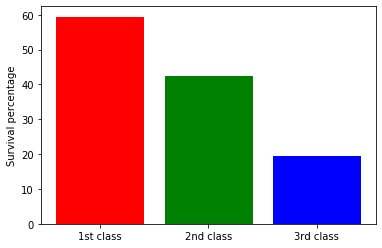

Survival percentage in 1st class:  59.43 %
Survival percentage in 2nd class:  42.45 %
Survival percentage in 3rd class:  19.55 %


In [11]:
fc_survivors_num = passenger_data[(passenger_data.PClass == '1st') & (passenger_data.Survived == 1)].shape[0]
sc_survivors_num = passenger_data[(passenger_data.PClass == '2nd') & (passenger_data.Survived == 1)].shape[0]
tc_survivors_num = passenger_data[(passenger_data.PClass == '3rd') & (passenger_data.Survived == 1)].shape[0]

fc_survivors_perc = round((fc_survivors_num/fc_passengers_num)*100,2)
sc_survivors_perc = round((sc_survivors_num/sc_passengers_num)*100,2)
tc_survivors_perc = round((tc_survivors_num/tc_passengers_num)*100,2)

plot = plt.bar([1, 2, 3], [fc_survivors_perc, sc_survivors_perc, tc_survivors_perc])
plt.xticks([1, 2, 3], ['1st class', '2nd class', '3rd class'])
plt.ylabel('Survival percentage')
plot[0].set_color('r')
plot[1].set_color('g')
plot[2].set_color('b')
plt.show()

print('Survival percentage in 1st class: ', fc_survivors_perc, '%')
print('Survival percentage in 2nd class: ', sc_survivors_perc, '%')
print('Survival percentage in 3rd class: ', tc_survivors_perc, '%')

Obviously people from first class had the best chances to survive, and people from third class had the worst chances. From this we conclude that passenger class is very important for predicting surviving chances. Next thing that comes to mind is that in such emergency situations, the first ones to be rescued are usually women and children. So the next thing we will do is calculating survival percentages based on gender:

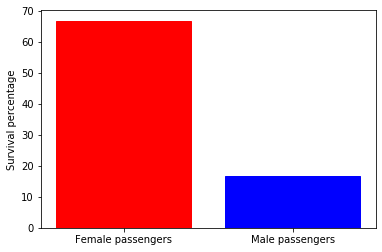

Female survival percentage:  66.74 %
Male survival percentage:  16.55 %


In [12]:
female_num = passenger_data[(passenger_data.Sex == 'female')].shape[0]
male_num = passenger_data[(passenger_data.Sex == 'male')].shape[0]

female_surv_num = passenger_data[(passenger_data.Sex == 'female') & (passenger_data.Survived == 1)].shape[0]
male_surv_num = passenger_data[(passenger_data.Sex == 'male') & (passenger_data.Survived == 1)].shape[0]

female_surv_perc = round((female_surv_num/female_num)*100,2)
male_surv_perc = round((male_surv_num/male_num)*100,2)

plot = plt.bar([1, 2], [female_surv_perc, male_surv_perc])
plt.xticks([1, 2], ['Female passengers', 'Male passengers'])
plt.ylabel('Survival percentage')
plot[0].set_color('r')
plot[1].set_color('b')
plt.show()

print('Female survival percentage: ', female_surv_perc, '%')
print('Male survival percentage: ', male_surv_perc, '%')

Looking at above results, we see that gender is a very important information for predictions. 

What's also interesting to mention is that the average age is different for different passenger classes. These information could be helpful while filling the missing values for Age column. These differences probably reflect the differences in financial situation of different age groups.

In [13]:
average_fc_age = passenger_data[(passenger_data.PClass == '1st')].Age.mean()
average_sc_age = passenger_data[(passenger_data.PClass == '2nd')].Age.mean()
average_tc_age = passenger_data[(passenger_data.PClass == '3rd')].Age.mean()

print('Average first-class age: ', round(average_fc_age,2))
print('Average second-class age: ', round(average_sc_age,2))
print('Average third-class age: ', round(average_tc_age,2))

Average first-class age:  39.46
Average second-class age:  28.3
Average third-class age:  25.2


We will draw the age bar plot to check for the existence of significant outliers, and to check for age distributon of passengers:

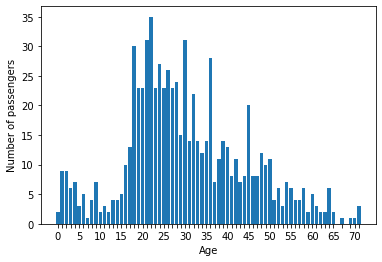

In [14]:
from collections import Counter

passenger_ages = passenger_data[passenger_data.Age.notnull()].Age.tolist()
passenger_ages = [int(round(i)) for i in passenger_ages]
passenger_ages.sort()

age_count = Counter(passenger_ages)
distinct_passenger_ages = list(dict.fromkeys(passenger_ages))
age_count = [ age_count[i] for i in distinct_passenger_ages ]

xticks = []

for i in range(0,len(distinct_passenger_ages)):
    
    if(distinct_passenger_ages[i] % 5 == 0):
        xticks.append(distinct_passenger_ages[i])
    else:
        xticks.append('')

        
plot = plt.bar(distinct_passenger_ages, age_count)
plt.xticks(distinct_passenger_ages, xticks)
plt.ylabel('Number of passengers')
plt.xlabel('Age')
plt.show()

As we already mentioned, children are first in the line to get on the lifeboats. It stands to reason to expect higher surivival rate for let's say passengers younger than 15 years old.

The exact age of a passenger is probably not that important. It's only important to make distinction between certain age groups. For example, it would be reasonable to try to divide passengers in four age groups: children, young people, middle-aged and elderly. In order to do that, we should come up with some treshold values dividing these four groups. Since it's not clear which treshold values to pick, we draw bar plot of survival percentages for each distinct age value:

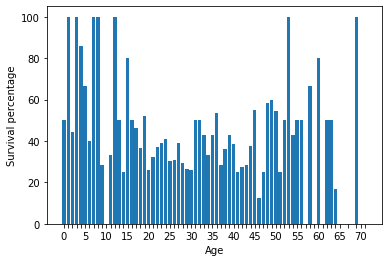

In [15]:
p_age = passenger_data[passenger_data.Age.notnull()].Age.tolist()
p_surv = passenger_data[passenger_data.Age.notnull()].Survived.tolist()

surv_perc = []

for i in distinct_passenger_ages:
    
    died = 0
    survived = 0
    
    for j in range(0, len(p_age)):
        if(round(p_age[j]) == i):
            if(p_surv[j] == 0):
                died += 1
            else:
                survived += 1

    surv_perc.append( round(((survived)/(survived+died))*100,2) )


plot = plt.bar(distinct_passenger_ages, surv_perc)
plt.xticks(distinct_passenger_ages, xticks)
plt.ylabel('Survival percentage')
plt.xlabel('Age')
plt.show()

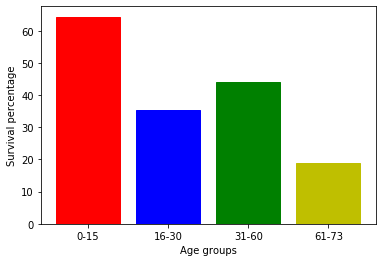

In [25]:
def get_survival_percentage(min_age, max_age):
    
    num_of_passengers = passenger_data[(passenger_data.Age >= min_age) & (passenger_data.Age <= max_age)].shape[0] 
    num_of_survivors = passenger_data[(passenger_data.Age >= min_age) & (passenger_data.Age <= max_age) & (passenger_data.Survived == 1)].shape[0]
    #print('Survival percentage for passengers between ', min_age , '-', max_age, ' years old: ', round((num_of_survivors/num_of_passengers)*100,2), '%')
    return round((num_of_survivors/num_of_passengers)*100,2)


children_surv_perc = get_survival_percentage(0,15)
young_surv_perc = get_survival_percentage(16,30)
middleage_surv_perc = get_survival_percentage(31,60)
elderly_surv_perc = get_survival_percentage(61,73)

plot = plt.bar([1, 2, 3, 4], [children_surv_perc, young_surv_perc, middleage_surv_perc, elderly_surv_perc])
plt.xticks([1, 2, 3, 4], ['0-15', '16-30', '31-60', '61-73'])
plt.ylabel('Survival percentage')
plt.xlabel('Age groups')
plot[0].set_color('r')
plot[1].set_color('b')
plot[2].set_color('g')
plot[3].set_color('y')
plt.show()

As we can see from the data, children and middle-aged people had better survival rates. On the other side, young people and elderly had lower chances, especially elderly. Real values in age column could be replaced by these categorical values. Next, we will try to get some useful insights from Name column. First, we can notice that some names have 'Master' title, while others have Mr. or Miss. 'Master' is a way of addressing politely a boy too young to be called 'Mister'. We can use this fact for filling missing age values for every passenger having this title. For example we can take the average age of all passengers with 'Master' title and input that value for all 'Master' passengers with missing age value. 

In [32]:
passenger_names = passenger_data.Name.tolist()
passenger_ages = passenger_data.Age.tolist()
passenger_survived = passenger_data.Survived.tolist()

masters = []

for i in range(0, len(passenger_names)):
    if('Master' in passenger_names[i]):
        masters.append((passenger_names[i], passenger_ages[i]))

master_ages = [j for i, j in masters if not np.isnan(j) ]

print('Number of passengers with Master title and missing age value: ', len(masters)-len(master_ages))
print('Age of the oldest passenger with Master title: ', max(master_ages))
print('Average age for passengers with Master title: ', round(sum(master_ages)/len(master_ages),2))

Number of passengers with Master title and missing age value:  26
Age of the oldest passenger with Master title:  13.0
Average age for passengers with Master title:  5.23


It makes sense also to check if passengers with special titles had better chances for getting into the lifeboats:

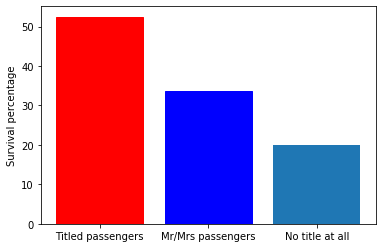

Passengers with title survival percentage:  52.5 %
Passengers with no special title survival percentage:  33.57 %
Passengers with no title at all survival percentage:  20 %


In [31]:
titles = ['Lady', 'Colonel', 'Major', 'Sir', 'Madame', 'Countess', 'Dr', 'Captain', 'Col']

title_dead = 0
title_surv = 0

notitle_dead = 0
notitle_surv = 0

for i in range(0, len(passenger_names)):
    if any(x in passenger_names[i] for x in titles):

        if(passenger_survived[i] == 1):
            title_surv += 1
        else:
            title_dead += 1
    else:

        if(passenger_survived[i] == 1):
            notitle_surv += 1
        else:
            notitle_dead += 1


title_pass_surv_perc = round(((title_surv)/(title_surv+title_dead))*100,2)
notitle_pass_surv_perc = round(((notitle_surv)/(notitle_surv+notitle_dead))*100,2)

plot = plt.bar([1, 2, 3], [title_pass_surv_perc, notitle_pass_surv_perc, 20])
plt.xticks([1, 2, 3], ['Titled passengers', 'Mr/Mrs passengers', 'No title at all'])
plt.ylabel('Survival percentage')
plot[0].set_color('r')
plot[1].set_color('b')
plt.show()            
            
print('Passengers with title survival percentage: ', title_pass_surv_perc , '%')
print('Passengers with no special title survival percentage: ', notitle_pass_surv_perc, '%')
print('Passengers with no title at all survival percentage: ', 20, '%')

In the end, we check if having family members onboard could increase chances of survival:

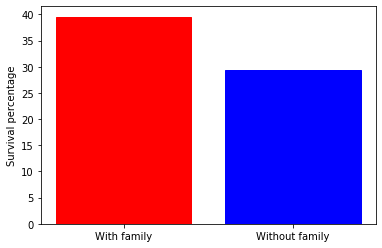

Passengers with family survival percentage:  39.55
Passengers without family survival percentage:  29.3


In [40]:
def has_family(pdata, name, cls):

    names = pdata[pdata.Name != name].Name.tolist()
    classes = pdata[pdata.Name != name].PClass.tolist()

    for i in range(0, len(names)):
        if (names[i].split(',')[0] == name.split(',')[0]) and (classes[i] == cls):
            return True

    return False


names = passenger_data.Name.tolist()
classes = passenger_data.PClass.tolist()
survived = passenger_data.Survived.tolist()

has_fam_num, has_fam_surv = 0, 0
no_fam_num, no_fam_surv = 0, 0

for i in range(0, len(names)):
    if has_family(passenger_data, names[i], classes[i]):
        has_fam_num += 1
        if survived[i] == 1:
            has_fam_surv += 1

    else:
        no_fam_num += 1
        if survived[i] == 1:
            no_fam_surv += 1

fam_surv_perc = round((has_fam_surv/has_fam_num)*100,2)
nofam_surv_perc = round((no_fam_surv / no_fam_num)*100, 2)

plot = plt.bar([1, 2], [fam_surv_perc, nofam_surv_perc])
plt.xticks([1, 2], ['With family', 'Without family'])
plt.ylabel('Survival percentage')
plot[0].set_color('r')
plot[1].set_color('b')
plt.show() 

print('Passengers with family survival percentage: ', fam_surv_perc)
print('Passengers without family survival percentage: ', nofam_surv_perc)